<a href="https://colab.research.google.com/github/MatheusSC017/BostonHousingDataRegression_SKLearn/blob/main/BostonHousingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing Data Regression

## Libraries
To start, let's import the libraries to use in this project.

In [1]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import (
    train_test_split, 
    GridSearchCV
)
from sklearn.ensemble import (
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
    AdaBoostRegressor, 
    RandomForestRegressor,
    ExtraTreesRegressor,
) 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as  sbn
import numpy as np
import pandas as pd

## Dataset Import
We will import the Boston housing dataset through the load_boston() method of the SKLearn library, which will return an object containing the dataset information, such as feature name, data and target.

In [2]:
boston_data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df['Prices'] = boston_data.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Data Clean
Using the info() method of pandas.DataFrame we noticed that there are no missing values.

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Prices   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Analyzing the raw data
In this section we will analyze our raw data and check if it is necessary to normalize them, checking information such as distribution, outliers and general information (mean, std, min, max and quantiles).

### Describe
The DataFrame pandas describe() method, we will return general information about our data such as the mean, std, min, max and percentiles

In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data correlation
Through the corr() method of Dataframe pandas and the seaborn library charts we will check how the resources are related to each other

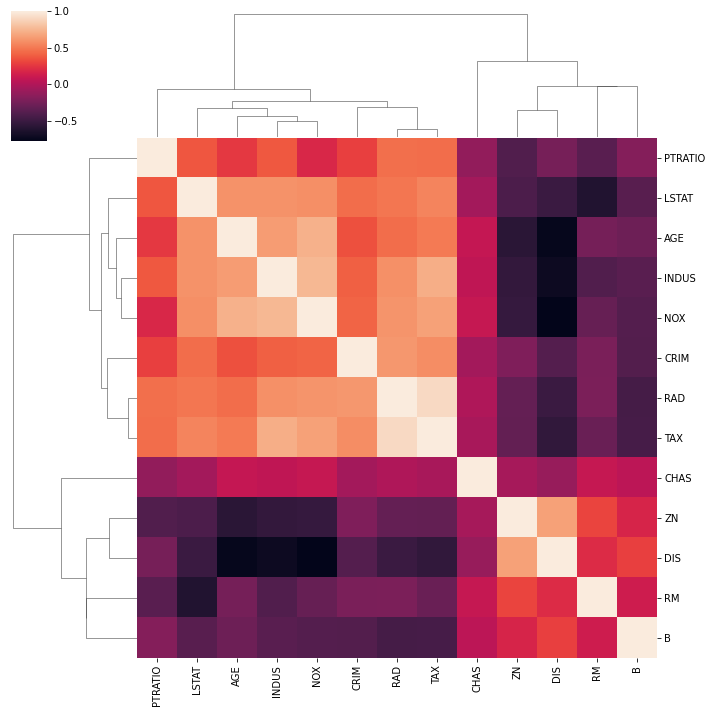

In [8]:
boston_corr = boston_df.drop('Prices', axis=1).corr()
sbn.clustermap(boston_corr)

### Graphical analysis
The next analysis to be carried out will be through the use of the type of BoxPlot graph that we will tell with the scale of the features, the presence of outliers and markings such as the mean and percentiles.

In [9]:
def plot_boxplot(figure, column, line, data, column_name, 
                 width=0.6, height=0.8):
    figure.add_axes((column, line, 0.6, 0.8))
    plt.ylabel(column_name)
    plt.boxplot(data, widths=0.8)

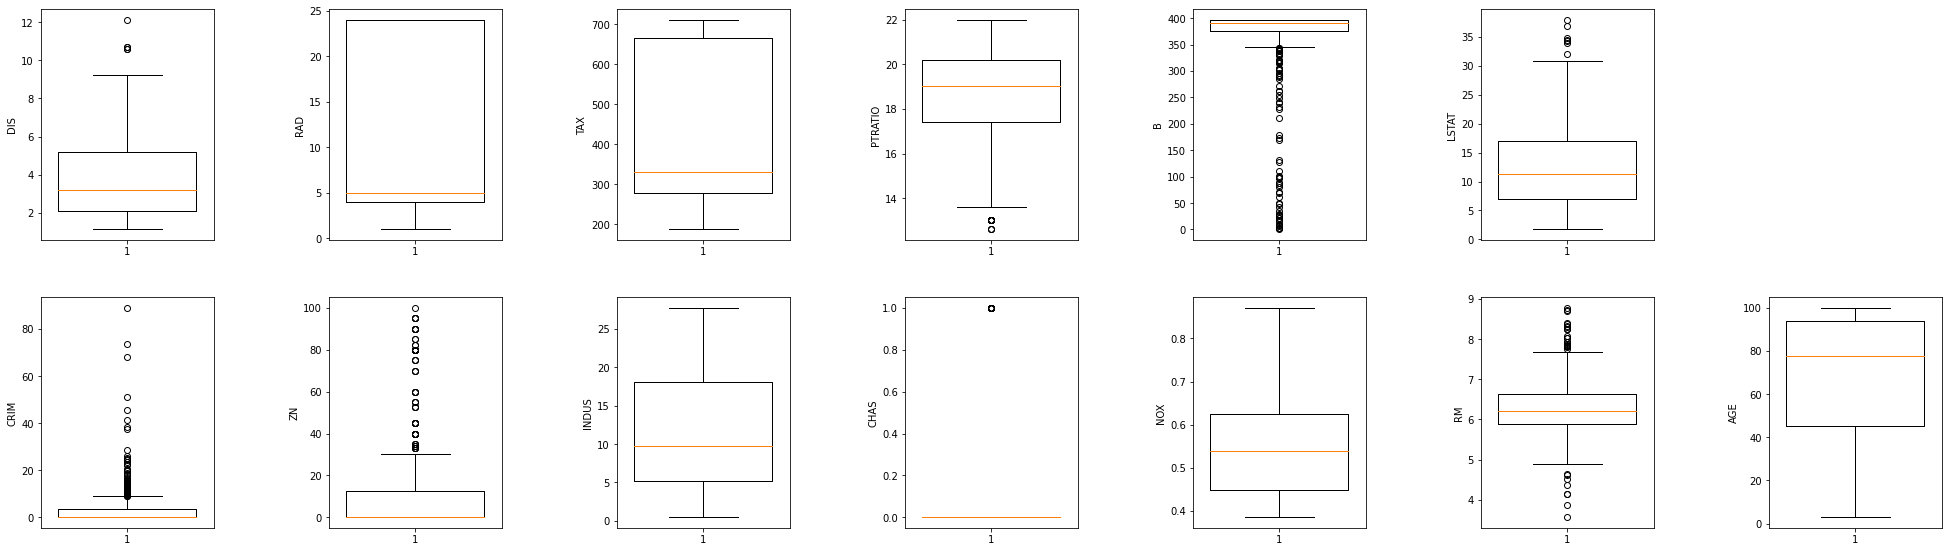

In [10]:
f = plt.figure(figsize=(4, 4))

i = 0
j = 0
for feature in boston_df.drop('Prices', axis=1):
    plot_boxplot(f, i, j, boston_df[feature], feature, width=0.8)
    i += 1
    if i == 7:
        i = 0
        j += 1

### Checking the outliers
The function below can calculate the percentage of outliers present for the informed feature

In [11]:
def calc_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # interquartile range
    iqr = q3 - q1

    # upper interquartile range
    uiqr = q3 + (iqr * 1.5)
    # lower interquartile range
    liqr = q1 - (iqr * 1.5)

    number_outliers = sum((data <= liqr) | (data >= uiqr))
    perc_outliers = (number_outliers / len(data)) * 100

    return round(perc_outliers, 2)

In [12]:
outliers_analyse = list()
for feature in boston_df.drop('Prices', axis=1):
    perc_outliers_data = calc_outliers(boston_df[feature])

    outliers_analyse.append(perc_outliers_data)

In [13]:
outliers_analyse = pd.DataFrame(outliers_analyse, 
                                index=boston_data.feature_names,
                                columns=['Outliers %'])
outliers_analyse

,Outliers %
CRIM,13.04
ZN,13.44
INDUS,0.00
CHAS,100.00
NOX,0.00
RM,5.93
AGE,0.00
DIS,0.99
RAD,0.00
TAX,0.00


### Data distribution
The next step will be to plot the distribution of the data

In [14]:
def plot_hist(figure, feature_data, feature_name, line, column, 
              width=0.8, height=0.8):
    figure.add_axes((line, column, width, height))
    plt.xlabel(feature_name)
    plt.hist(feature_data)

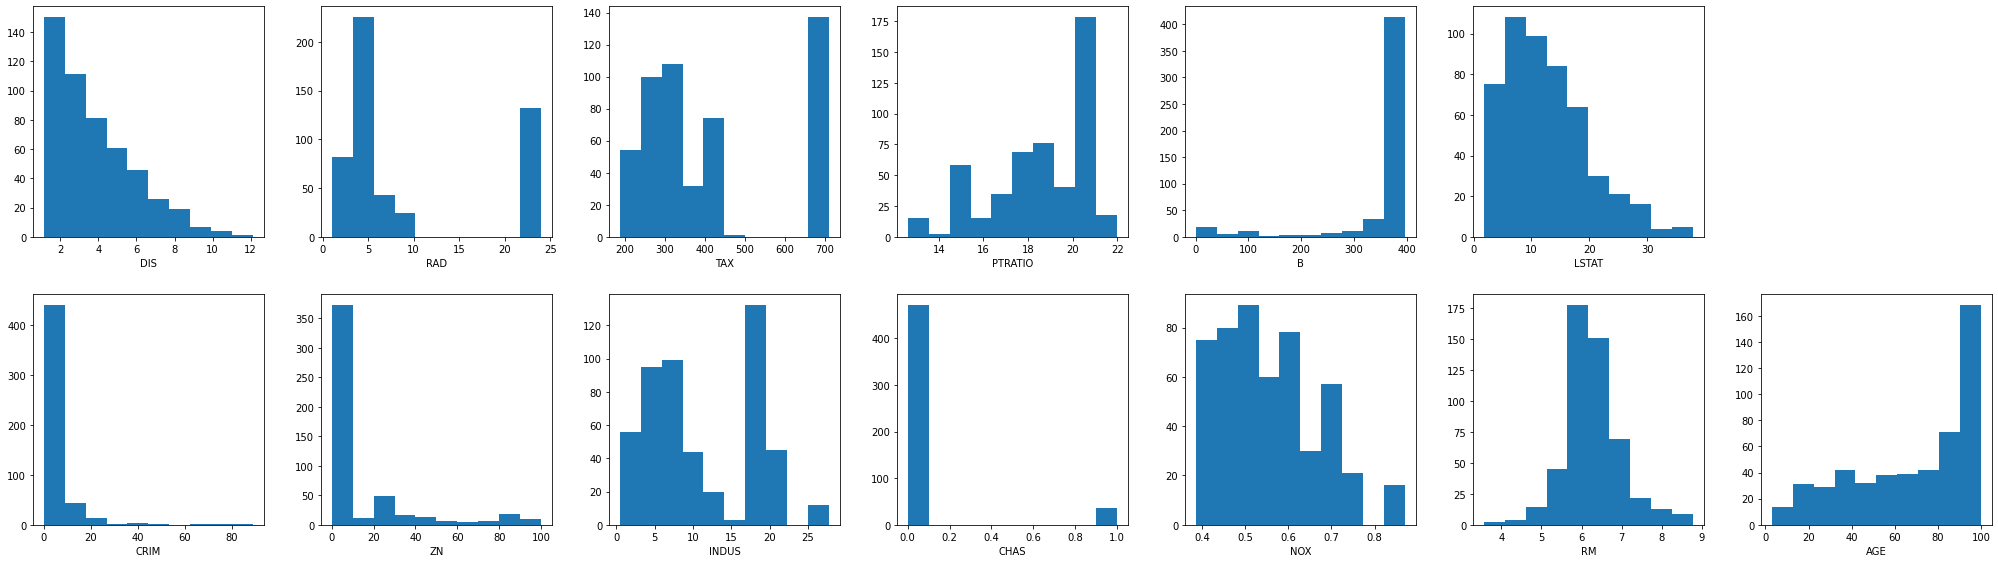

In [15]:
f = plt.figure(figsize=(4, 4))

i = 0
j = 0
for feature in boston_df.drop('Prices', axis=1):
    plot_hist(f, boston_df[feature], feature, i, j)

    i += 1
    if i == 7:
        i = 0
        j += 1

## Data Split
In this step, we will split our dataset into training and testing subsets

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(
    boston_df.drop('Prices', axis=1),
    boston_df['Prices'], 
    test_size=0.2,
    random_state=701
)

## Data Normalization
For this dataset, we will use Quantile Normalization to eliminate outliers and scale features

In [17]:
qt = QuantileTransformer()
X_train_normalized = pd.DataFrame(qt.fit_transform(X_train, Y_train))
X_train_normalized.columns = X_train.columns

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (404). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


In [18]:
boston_df_normalized = X_train_normalized.copy()
boston_df_normalized['Prices'] = Y_train
boston_df_normalized

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
0,0.406948,0.000000,0.574442,0.0,0.081886,0.316377,0.048387,0.760546,0.277916,0.374690,0.555831,0.267990,0.411911,24.0
1,0.947891,0.000000,0.756824,0.0,0.812655,0.526055,1.000000,0.031017,1.000000,0.858561,0.758065,0.588089,0.888337,21.6
2,0.042184,0.921836,0.102978,0.0,0.027295,0.826303,0.019851,0.834988,0.000000,0.177419,0.140199,0.564516,0.114144,NaN
3,0.014888,1.000000,0.014888,0.0,0.068238,0.828784,0.210918,0.962779,0.502481,0.151365,0.106700,0.538462,0.058313,33.4
4,0.942928,0.000000,0.756824,0.0,0.812655,0.729529,0.905707,0.066998,1.000000,0.858561,0.758065,1.000000,0.873449,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.183623,0.000000,0.590571,0.0,0.171216,0.535980,0.310174,0.732010,0.502481,0.593052,0.478908,0.362283,0.531017,NaN
400,0.751861,0.000000,0.756824,0.0,0.629032,0.575682,0.290323,0.615385,1.000000,0.858561,0.758065,0.399504,0.456576,5.6
401,0.476427,0.000000,0.555831,1.0,0.342432,0.196030,0.312655,0.560794,0.277916,0.235732,0.450372,0.460298,0.704715,7.2
402,0.200993,0.000000,0.255583,0.0,0.434243,0.327543,0.349876,0.724566,0.502481,0.073201,0.758065,1.000000,0.364764,NaN


## Data analysis
Now, let's compare the raw data with the normalized data to see how the scaling and distribution of the data occurred.

### Describe
Looking at the general information about the two datasets, we see that the features of the normalized dataset have been re-scaled and now have similar information, such as mean, std and the percentiles.

In [19]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
boston_df_normalized.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,321.000000
mean,0.500000,0.231807,0.500123,0.076733,0.500350,0.500000,0.504109,0.500028,0.532799,0.499994,0.500018,0.531017,0.500000,24.019315
std,0.289749,0.386311,0.287334,0.266497,0.290360,0.289749,0.296306,0.289750,0.330812,0.287348,0.286523,0.330023,0.289749,9.253901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.250000,0.000000,0.255583,0.000000,0.248139,0.250000,0.250000,0.250000,0.277916,0.246898,0.261787,0.250000,0.250000,18.700000
50%,0.500000,0.000000,0.508685,0.000000,0.509926,0.500000,0.501241,0.500000,0.502481,0.495037,0.501241,0.500000,0.500000,22.200000
75%,0.750000,0.741935,0.756824,0.000000,0.743176,0.750000,0.750620,0.750000,1.000000,0.858561,0.758065,0.812035,0.750000,27.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


### Data correlation
Looking at the general information about the two datasets, we see that the features of the normalized dataset have been re-scaled and now have similar information, such as mean, std and the percentiles.

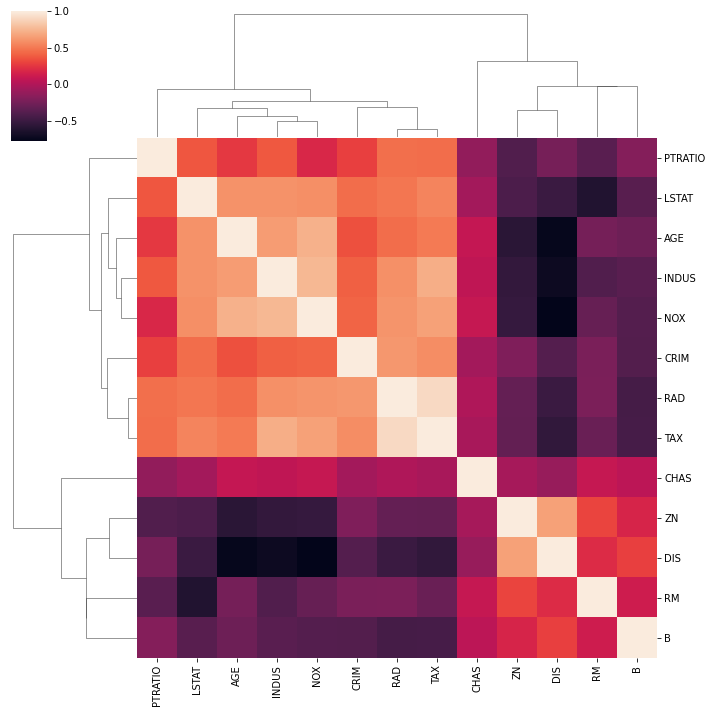

In [21]:
boston_corr = boston_df.drop('Prices', axis=1).corr()
sbn.clustermap(boston_corr)

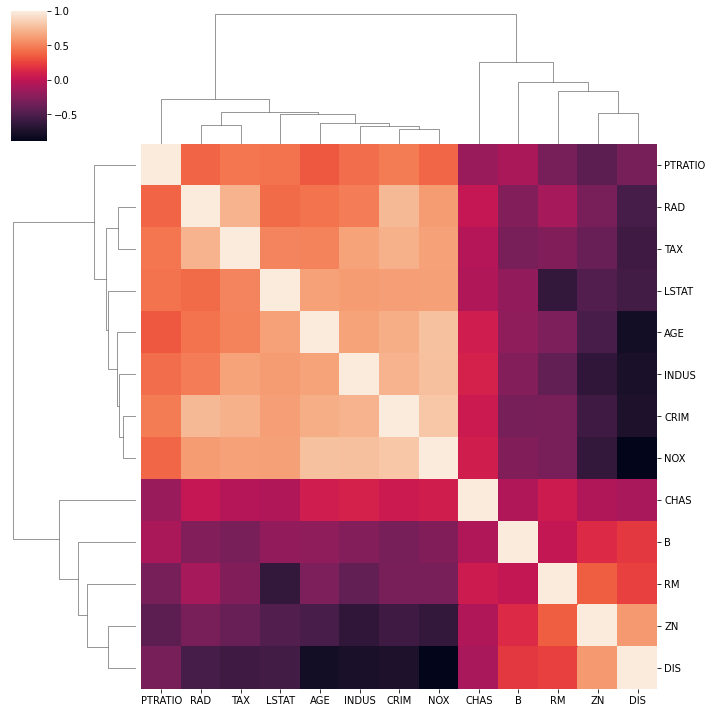

In [22]:
boston_normalized_corr = X_train_normalized.corr()
sbn.clustermap(boston_normalized_corr)

### Graphical analysis
In this part we will plot boxplot plots to compare general information in the raw dataset and in the normalized dataset, such as the mean and the presence of outliers

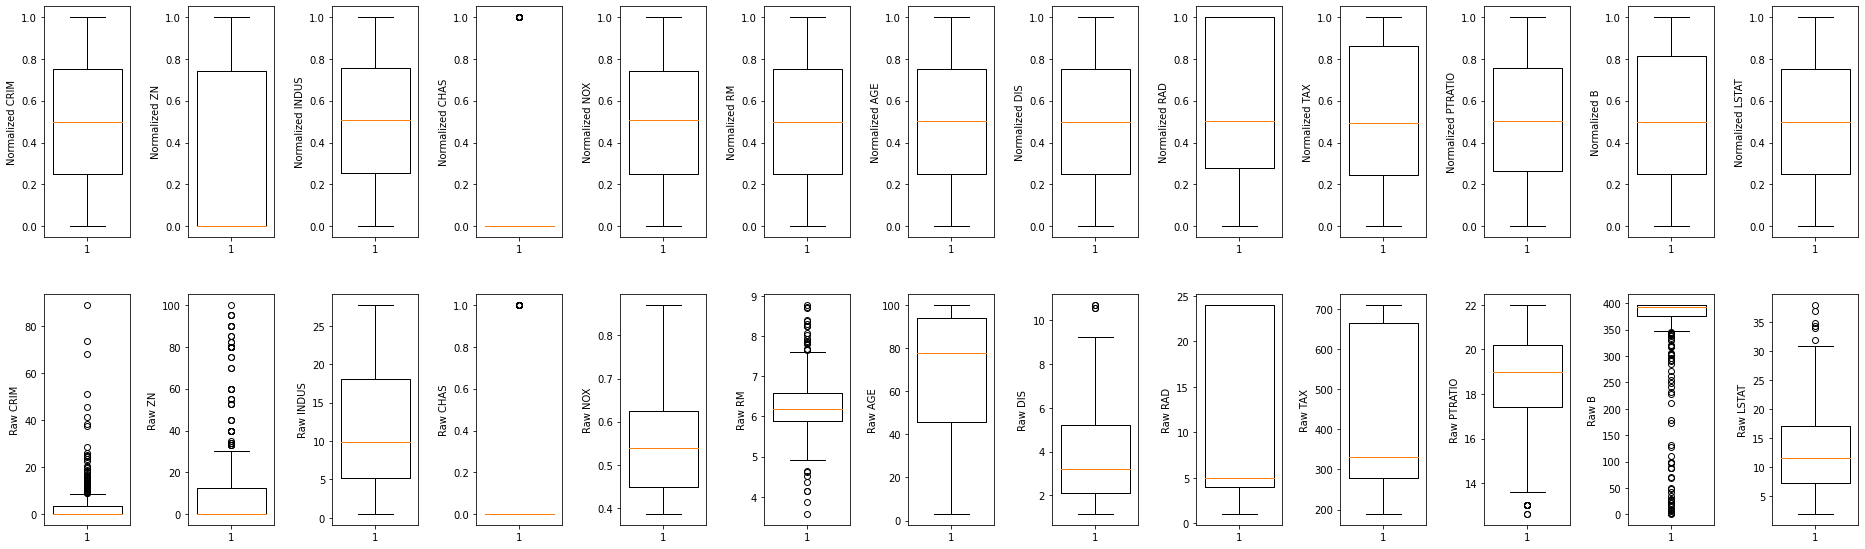

In [23]:
f = plt.figure(1, figsize=(2, 4))

i = 0
for feature in X_train:
    plot_boxplot(f, i, 0, X_train[feature], ('Raw ' + feature))
    plot_boxplot(f, i, 1, X_train_normalized[feature], 
                 ('Normalized ' + feature))

    i += 1

### Outliers
In the code below we have the calculation of the percentage of outliers for both datasets, with it we can see that the normalization applied significantly reduced the number of outliers

In [24]:
outliers_analyse = list()
for feature in X_train:
    perc_outliers_raw_data = calc_outliers(X_train[feature])
    perc_outliers_normalized_data = calc_outliers(X_train_normalized[feature])

    outliers_analyse.append([perc_outliers_raw_data,
                             perc_outliers_normalized_data])

In [25]:
outliers_analyse = pd.DataFrame(outliers_analyse, 
                                index=boston_data.feature_names,
                                columns=['Raw data %', 'Normalized data %'])
outliers_analyse

,Raw data %,Normalized data %
CRIM,13.12,0.0
ZN,14.11,0.0
INDUS,0.00,0.0
CHAS,100.00,100.0
NOX,0.00,0.0
RM,6.93,0.0
AGE,0.00,0.0
DIS,0.99,0.0
RAD,0.00,0.0
TAX,0.00,0.0


### Data distribution
When analyzing the histograms below, we have a clear change compared to before and after we apply the normalization techniques

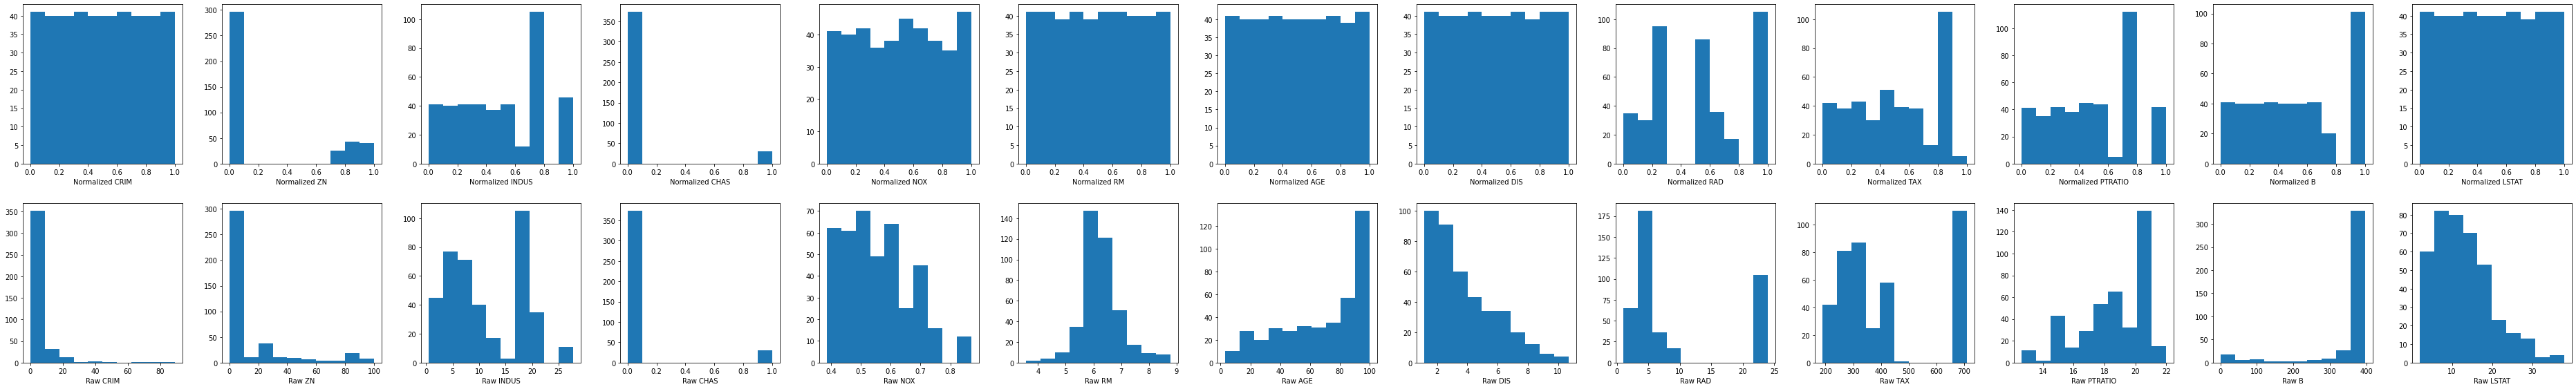

In [26]:
f = plt.figure(figsize=(4, 4))

i = 0
for feature in X_train:
    plot_hist(f, X_train[feature], 'Raw ' + feature, i, 0)
    plot_hist(f, X_train_normalized[feature], 'Normalized ' + feature, i, 1)
    i += 1

### Target data
Plotting the target data

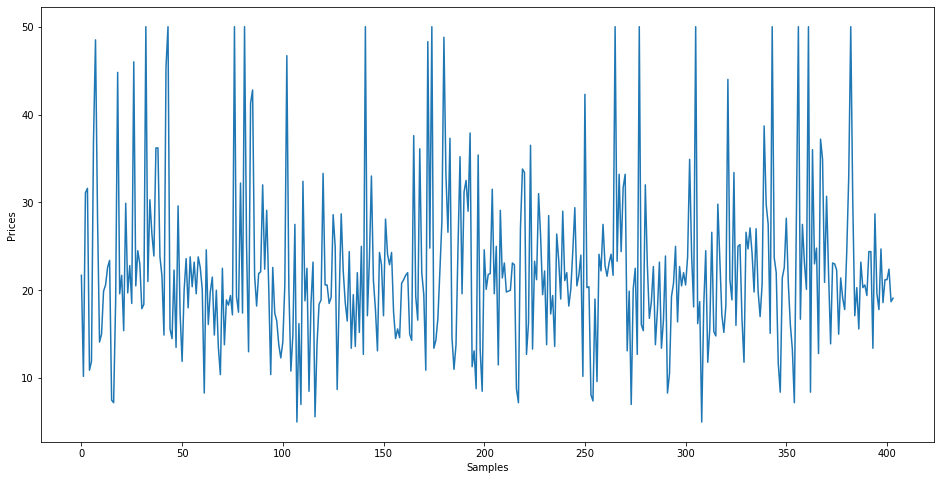

In [27]:
f = plt.figure(2, figsize=(16, 8))
plt.ylabel('Prices')
plt.xlabel('Samples')
plt.plot(np.array(Y_train))

## Data Decomposition (PCA)
In this section we will discover the Principal Components of our features, with the objective of finding the minimum number of features that explain the maximum variance of the data.

We will set the number of features that the PCA class must find as 5

In [28]:
pca = PCA(n_components=5)

In [29]:
pca.fit(X_train_normalized, Y_train)

PCA(n_components=5)

As you can see in the code output below, a single feature can explain more than 50% of the variance in our data.

In [30]:
pca.explained_variance_ratio_

array([0.50571662, 0.10622904, 0.08236141, 0.07395262, 0.05938244])

Plotting a graph with the accumulated variation by number of features, we see that 5 features can explain almost 90% of the variance of our dataset. We are not going to get more features to reduce the risk of overfitting when we train our model

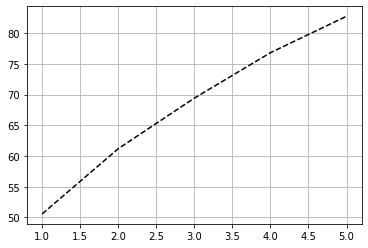

In [31]:
plt.plot(range(1, 6),
         pca.explained_variance_ratio_.cumsum() * 100,
         'k--')
plt.grid()

Through the transform() method we can select the features chosen for our PCA fitting

In [32]:
pca.transform(X_train_normalized)

array([[ 0.34623339,  0.2030321 , -0.0175997 , -0.55575648, -0.29897548],
       [-1.11500587, -0.10537899, -0.15601622,  0.3203042 ,  0.0437975 ],
       [ 1.44371411, -0.17646073,  0.02007895, -0.09624793,  0.08454114],
       ...,
       [ 0.06305698,  0.32243105,  0.59332869, -0.25198537,  0.27463221],
       [ 0.38841774,  0.58705574, -0.12619234,  0.14988425, -0.29029068],
       [-0.66231461, -0.12076435, -0.32712502,  0.07767639, -0.18359483]])

## Model selection
During model selection, we will test our dataset with a variety of combinations of models and parameters to discover the best combination to predict our dataset.

In [33]:
pipeline = Pipeline(steps=[
    ('regressor', GradientBoostingRegressor())
])

We will test four different types of models in our dataset, 2 being gradient descent based models and 2 decision tree based models.

In [34]:
param_grid = [
    {
        'regressor': [GradientBoostingRegressor()], 
        'regressor__learning_rate': [lr / 100 for lr in range(1, 21)], 
        'regressor__n_estimators': [n for n in range(50, 310, 10)]
    }, {
        'regressor': [AdaBoostRegressor()],
        'regressor__n_estimators': [n for n in range(10, 110, 10)], 
        'regressor__learning_rate': [lr / 10 for lr in range(1, 21)]
    }, {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [n for n in range(50, 310, 10)],
        'regressor__max_depth': [max for max in range(1, 7)]
    }, {
        'regressor': [ExtraTreesRegressor()],
        'regressor__n_estimators': [n for n in range(50, 310, 10)],
        'regressor__max_depth': [max for max in range(1, 7)]
    }
]

We will use GridSearchCV to perform the search for the combination of parameters in an exhaustive way, testing all possible combinations. The scoring type chosen for this selection was the Root Mean Squared Error (RMSE) and we set the cross-validation (CV) number to 4

In [35]:
grid_search = GridSearchCV(pipeline, 
                           param_grid, 
                           scoring='neg_root_mean_squared_error',
                           cv=4)

In [36]:
grid_search.fit(pca.transform(X_train_normalized), Y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('regressor',
                                        GradientBoostingRegressor())]),
             param_grid=[{'regressor': [GradientBoostingRegressor()],
                          'regressor__learning_rate': [0.01, 0.02, 0.03, 0.04,
                                                       0.05, 0.06, 0.07, 0.08,
                                                       0.09, 0.1, 0.11, 0.12,
                                                       0.13, 0.14, 0.15, 0.16,
                                                       0.17, 0.18, 0.19, 0.2],
                          'regressor__n_estimators': [50, 60, 70, 80, 90, 100,
                                                      110, 120, 130, 140, 150,
                                                      160, 170, 180, 19...
                          'regressor__n_estimators': [50, 60, 70, 80, 90, 100,
                                                      110, 120, 130, 140, 150,
 

The best_params_ attribute will return us the combination of the best model and parameters that GridSearchCV finds

In [37]:
grid_search.best_params_

{'regressor': RandomForestRegressor(max_depth=6, n_estimators=50),
 'regressor__max_depth': 6,
 'regressor__n_estimators': 50}

Showing all combinations sorted by test score ranking

In [38]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor,param_regressor__learning_rate,param_regressor__n_estimators,param_regressor__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
850,0.081493,0.003980,0.005037,0.000050,"RandomForestRegressor(max_depth=6, n_estimator...",NaN,50,6,{'regressor': RandomForestRegressor(max_depth=...,-5.793554,-5.427492,-3.881547,-4.656697,-4.939823,0.736000,1
873,0.451646,0.005164,0.024558,0.000495,"RandomForestRegressor(max_depth=6, n_estimator...",NaN,280,6,{'regressor': RandomForestRegressor(max_depth=...,-5.892980,-5.513658,-3.831678,-4.535811,-4.943532,0.810702,2
859,0.225667,0.003403,0.013350,0.000566,"RandomForestRegressor(max_depth=6, n_estimator...",NaN,140,6,{'regressor': RandomForestRegressor(max_depth=...,-5.845487,-5.554367,-3.892455,-4.516246,-4.952139,0.786397,3
865,0.318857,0.009266,0.017752,0.000398,"RandomForestRegressor(max_depth=6, n_estimator...",NaN,200,6,{'regressor': RandomForestRegressor(max_depth=...,-5.747939,-5.596411,-3.846132,-4.620790,-4.952818,0.771594,4
855,0.161699,0.004314,0.009757,0.000742,"RandomForestRegressor(max_depth=6, n_estimator...",NaN,100,6,{'regressor': RandomForestRegressor(max_depth=...,-5.859064,-5.469323,-3.963068,-4.527379,-4.954709,0.749775,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,0.159408,0.003699,0.017556,0.000156,ExtraTreesRegressor(),NaN,220,1,"{'regressor': ExtraTreesRegressor(), 'regresso...",-8.874780,-8.510697,-6.623900,-7.931591,-7.985242,0.854914,1028
897,0.191307,0.004808,0.025722,0.007581,ExtraTreesRegressor(),NaN,260,1,"{'regressor': ExtraTreesRegressor(), 'regresso...",-8.912517,-8.499853,-6.641989,-7.932926,-7.996821,0.856036,1029
898,0.192991,0.006993,0.022279,0.002316,ExtraTreesRegressor(),NaN,270,1,"{'regressor': ExtraTreesRegressor(), 'regresso...",-8.883182,-8.531068,-6.692153,-7.883186,-7.997397,0.834584,1030
881,0.072159,0.002539,0.009477,0.001019,ExtraTreesRegressor(),NaN,100,1,"{'regressor': ExtraTreesRegressor(), 'regresso...",-8.903806,-8.503768,-6.650641,-7.932365,-7.997645,0.850877,1031


## Feature selection
The next step will be the selection of features that best adapt to our model and parameters. For this, we will use the SequentialFeatureSelector class passing as parameters the model with its hyperparameters, the number of features we want to discover, the method that the features will be chosen and the number of cross-validation subsets.

In [39]:
sfs = SequentialFeatureSelector(GradientBoostingRegressor(learning_rate=0.09, 
                                                          n_estimators=250),
                                n_features_to_select=5,
                                direction='backward',
                                cv=5)

In [40]:
sfs.fit(X_train_normalized, Y_train)

SequentialFeatureSelector(direction='backward',
                          estimator=GradientBoostingRegressor(learning_rate=0.09,
                                                              n_estimators=250),
                          n_features_to_select=5)

In [41]:
sfs.get_feature_names_out()

array(['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype=object)

## Model Training
Now that we have the model, hyperparameters, and feature subsets, we can train a model to predict our dataset.

In [42]:
reg = GradientBoostingRegressor(learning_rate=0.09, n_estimators=250)

In [46]:
X_test_normalized = pd.DataFrame(qt.transform(X_test), columns=X_test.columns)

In [47]:
reg.fit(sfs.transform(X_train_normalized), Y_train)

GradientBoostingRegressor(learning_rate=0.09, n_estimators=250)

As you can see below, our model achieved a score of approximately 0.92, with the maximum possible score being 1.

In [48]:
reg.score(sfs.transform(X_test_normalized), Y_test)

0.9209050035209656

Plotting the loss for each iteration of our training

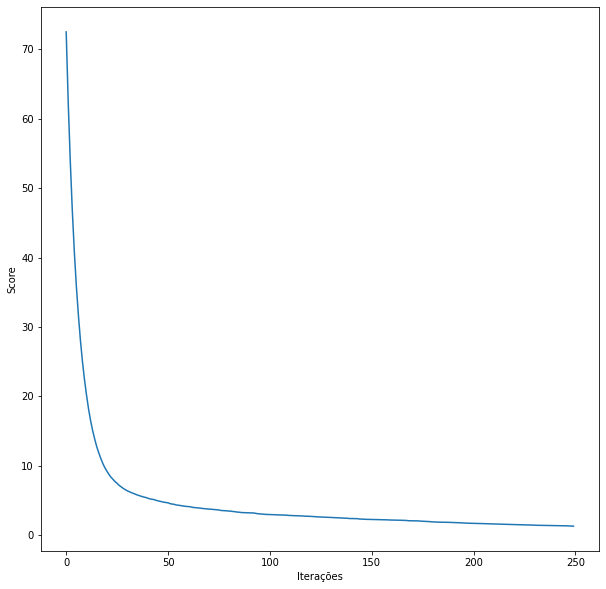

In [49]:
plt.figure(figsize=(10, 10))
plt.ylabel('Score')
plt.xlabel('Iterações')
plt.plot(reg.train_score_)

Plotting a graph comparing predictions to actual data

In [53]:
Y_pred = reg.predict(sfs.transform(X_test_normalized))

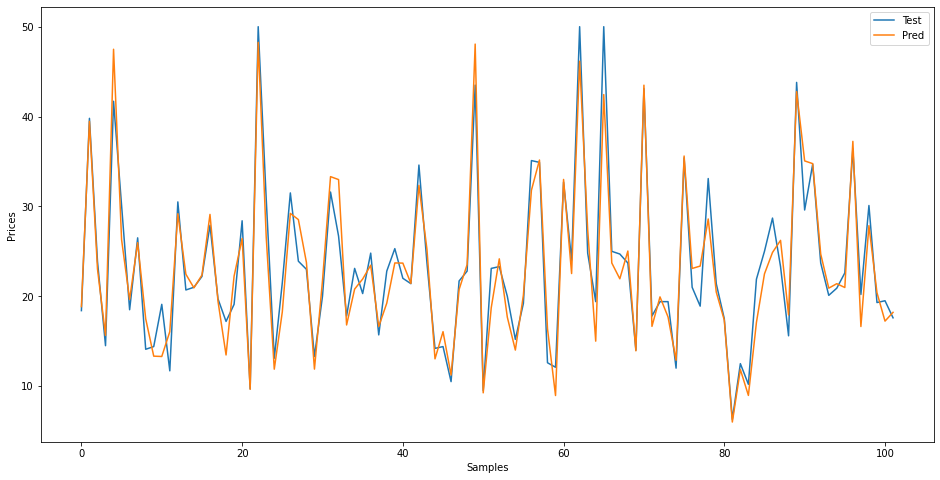

In [54]:
f = plt.figure(2, figsize=(16, 8))
plt.ylabel('Prices')
plt.xlabel('Samples')
plt.plot(np.array(Y_test), label='Test')
plt.plot(Y_pred, label='Pred')
plt.legend()